In [1]:
#python packages that are required
#do install them using conda in anaconda
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [47]:
#pandas default setting changed for easier viewing
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.set_option('display.expand_frame_repr', False)
#plot size ans style changed for maps
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(25,12))

In [3]:
#load the dataset from the water boards
df = pd.read_excel(r'datasets/sample.xls')

In [4]:
#number of rows and columns
df.shape

(641, 15)

In [5]:
#first five rows of the dataset
df.head()

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
0,MADHYA PRADESH,JHABUA,6.24,NaN,NaN,NaN,9.64,NaN,NaN,6.83,NaN,NaN,5.68,NaN,7.37
1,JAMMU & KASHMIR,JAMMU,5.91,NaN,NaN,NaN,5.49,NaN,NaN,4.50,NaN,NaN,5.13,NaN,5.21
2,BIHAR,DARBHANGA,3.30,NaN,NaN,NaN,4.44,NaN,NaN,4.23,NaN,NaN,3.65,NaN,4.76
3,BIHAR,SHEOHAR,1.44,NaN,NaN,NaN,2.76,NaN,NaN,3.25,NaN,NaN,2.52,NaN,3.04
4,MIZORAM,LUNGLEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# sort based on the state and district in alphabetical order
df = df.sort_values(['STATE', 'DISTRICT'], ascending=[True, True])

In [7]:
#view the whole dataframe
df

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016
568,ANDAMAN & NICOBAR,NICOBAR,NaN,NaN,NaN,NaN,4.16,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN
394,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN
403,ANDAMAN & NICOBAR,SOUTH ANDAMAN,NaN,NaN,NaN,NaN,2.58,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN
13,ANDHRA PRADESH,ANANTAPUR,8.35,NaN,NaN,NaN,9.53,NaN,NaN,9.63,NaN,NaN,7.36,NaN,6.75
637,ANDHRA PRADESH,CHITTOOR,8.67,NaN,NaN,NaN,10.14,NaN,NaN,9.96,NaN,NaN,7.91,NaN,2.67
178,ANDHRA PRADESH,EAST GODAVARI,3.92,NaN,NaN,NaN,4.59,NaN,NaN,2.96,NaN,NaN,3.36,NaN,3.41
321,ANDHRA PRADESH,GUNTUR,3.60,NaN,NaN,NaN,5.42,NaN,NaN,4.59,NaN,NaN,4.99,NaN,5.06
333,ANDHRA PRADESH,KRISHNA,3.74,NaN,NaN,NaN,5.17,NaN,NaN,3.91,NaN,NaN,4.97,NaN,5.19
14,ANDHRA PRADESH,KURNOOL,5.07,NaN,NaN,NaN,7.44,NaN,NaN,8.21,NaN,NaN,6.06,NaN,7.06
412,ANDHRA PRADESH,PRAKASAM,5.45,NaN,NaN,NaN,7.89,NaN,NaN,7.36,NaN,NaN,7.72,NaN,7.42


In [8]:
# loading the shapefile for the india districts map as a GEOdataframe
fp = "map/set2/IND_adm2.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,ANDAMAN & NICOBAR,1,NORTH & MIDDLE ANDAMAN,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,ANDAMAN & NICOBAR,2,NICOBAR,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Y.S.R.,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [9]:
#drop unwanted columns
map_df = map_df.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'ID_2', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2'])

In [10]:
#rename the columns for easy access
print(map_df.columns)
map_df.columns = ['STATE', 'DISTRICT', 'OTHER', 'geometry'] 

Index(['NAME_1', 'NAME_2', 'VARNAME_2', 'geometry'], dtype='object')


In [11]:
#print the map GEOdataframe
map_df

,STATE,DISTRICT,OTHER,geometry
0,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,ANDAMAN & NICOBAR,NICOBAR,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,Andhra Pradesh,Anantapur,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,Andhra Pradesh,Chittoor,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,Andhra Pradesh,Y.S.R.,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."
5,Andhra Pradesh,East Godavari,None,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16..."
6,Andhra Pradesh,Guntur,None,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15..."
7,Andhra Pradesh,Krishna,Kistna,"MULTIPOLYGON (((81.02792 15.76569, 81.02792 15..."
8,Andhra Pradesh,Kurnool,None,"POLYGON ((78.88907 16.09856, 78.90118 16.09762..."
9,Andhra Pradesh,SRI POTTI SRIRAMULU NELLORE,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."


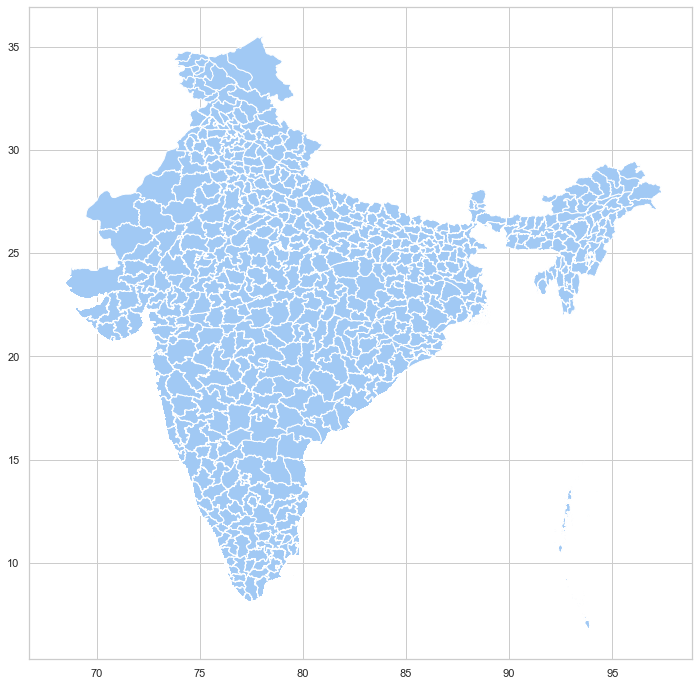

In [48]:
#plot the map of india districts
map_df.plot()

In [13]:
#make the GEOdataframe keys same as that in the dataset
map_df['DISTRICT'] = map_df.DISTRICT.str.upper()
map_df['STATE'] = map_df.STATE.str.upper()
map_df.head()

,STATE,DISTRICT,OTHER,geometry
0,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,ANDAMAN & NICOBAR,NICOBAR,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,ANDHRA PRADESH,ANANTAPUR,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,ANDHRA PRADESH,CHITTOOR,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,ANDHRA PRADESH,Y.S.R.,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [14]:
#left join the GEOdataframe on the dataset
df = df.join(map_df.set_index(['DISTRICT','STATE']), on=['DISTRICT','STATE'])

In [15]:
#pint the dataset
df

,STATE,DISTRICT,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,OTHER,geometry
568,ANDAMAN & NICOBAR,NICOBAR,NaN,NaN,NaN,NaN,4.16,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
394,ANDAMAN & NICOBAR,NORTH & MIDDLE ANDAMAN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
403,ANDAMAN & NICOBAR,SOUTH ANDAMAN,NaN,NaN,NaN,NaN,2.58,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN,NaN,None
13,ANDHRA PRADESH,ANANTAPUR,8.35,NaN,NaN,NaN,9.53,NaN,NaN,9.63,NaN,NaN,7.36,NaN,6.75,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
637,ANDHRA PRADESH,CHITTOOR,8.67,NaN,NaN,NaN,10.14,NaN,NaN,9.96,NaN,NaN,7.91,NaN,2.67,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
178,ANDHRA PRADESH,EAST GODAVARI,3.92,NaN,NaN,NaN,4.59,NaN,NaN,2.96,NaN,NaN,3.36,NaN,3.41,None,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16..."
321,ANDHRA PRADESH,GUNTUR,3.60,NaN,NaN,NaN,5.42,NaN,NaN,4.59,NaN,NaN,4.99,NaN,5.06,None,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15..."
333,ANDHRA PRADESH,KRISHNA,3.74,NaN,NaN,NaN,5.17,NaN,NaN,3.91,NaN,NaN,4.97,NaN,5.19,Kistna,"MULTIPOLYGON (((81.02792 15.76569, 81.02792 15..."
14,ANDHRA PRADESH,KURNOOL,5.07,NaN,NaN,NaN,7.44,NaN,NaN,8.21,NaN,NaN,6.06,NaN,7.06,None,"POLYGON ((78.88907 16.09856, 78.90118 16.09762..."
412,ANDHRA PRADESH,PRAKASAM,5.45,NaN,NaN,NaN,7.89,NaN,NaN,7.36,NaN,NaN,7.72,NaN,7.42,None,"MULTIPOLYGON (((80.05986 15.19986, 80.05986 15..."


In [16]:
#check how many records are null 
#to get a basic idea of the dataset
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Jan 2015     27
Feb 2015    641
Mar 2015    576
Apr 2015    578
May 2015    152
Jun 2015    641
Jul 2015    641
Aug 2015     27
Sep 2015    641
Oct 2015    641
Nov 2015     24
Dec 2015    641
Jan 2016     42
OTHER       465
geometry     57
dtype: int64

In [17]:
#list to fix the GEOdataframe to match as many districts as possible
print(df[df["geometry"].isnull()][['DISTRICT','STATE']])

                         DISTRICT              STATE
403                 SOUTH ANDAMAN  ANDAMAN & NICOBAR
88                          ANJAW  ARUNACHAL PRADESH
208                         BAKSA              ASSAM
373                       CHIRANG              ASSAM
233                    DIMA HASAO              ASSAM
230                        KAMRUP              ASSAM
289                      UDALGURI              ASSAM
245                         ARWAL              BIHAR
427                       BIJAPUR       CHHATTISGARH
501                    NARAYANPUR       CHHATTISGARH
456                       CENTRAL              DELHI
188                          EAST              DELHI
368                     NEW DELHI              DELHI
473                         NORTH              DELHI
524                    NORTH EAST              DELHI
581                    NORTH WEST              DELHI
618                         SOUTH              DELHI
247                    SOUTH WEST             

In [18]:
#plot values of water level as of Jan 2015 for districts that are in the GEOdataframe
temp_map = df[df["geometry"].notnull()][['DISTRICT','STATE','Jan 2015','geometry']]
temp_map

,DISTRICT,STATE,Jan 2015,geometry
568,NICOBAR,ANDAMAN & NICOBAR,NaN,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
394,NORTH & MIDDLE ANDAMAN,ANDAMAN & NICOBAR,NaN,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
13,ANANTAPUR,ANDHRA PRADESH,8.35,"POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
637,CHITTOOR,ANDHRA PRADESH,8.67,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
178,EAST GODAVARI,ANDHRA PRADESH,3.92,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16..."
321,GUNTUR,ANDHRA PRADESH,3.60,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15..."
333,KRISHNA,ANDHRA PRADESH,3.74,"MULTIPOLYGON (((81.02792 15.76569, 81.02792 15..."
14,KURNOOL,ANDHRA PRADESH,5.07,"POLYGON ((78.88907 16.09856, 78.90118 16.09762..."
412,PRAKASAM,ANDHRA PRADESH,5.45,"MULTIPOLYGON (((80.05986 15.19986, 80.05986 15..."
369,SRI POTTI SRIRAMULU NELLORE,ANDHRA PRADESH,5.10,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."


In [19]:
#convert the dataset to draw a map
gdf = gpd.GeoDataFrame(temp_map)

In [57]:
# normalize color
vmin, vmax, vcenter = gdf['Jan 2015'].min(), gdf['Jan 2015'].max(), (gdf['Jan 2015'].max()+gdf['Jan 2015'].min())/4
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cbar = plt.cm.ScalarMappable(norm=divnorm, cmap='gist_earth')

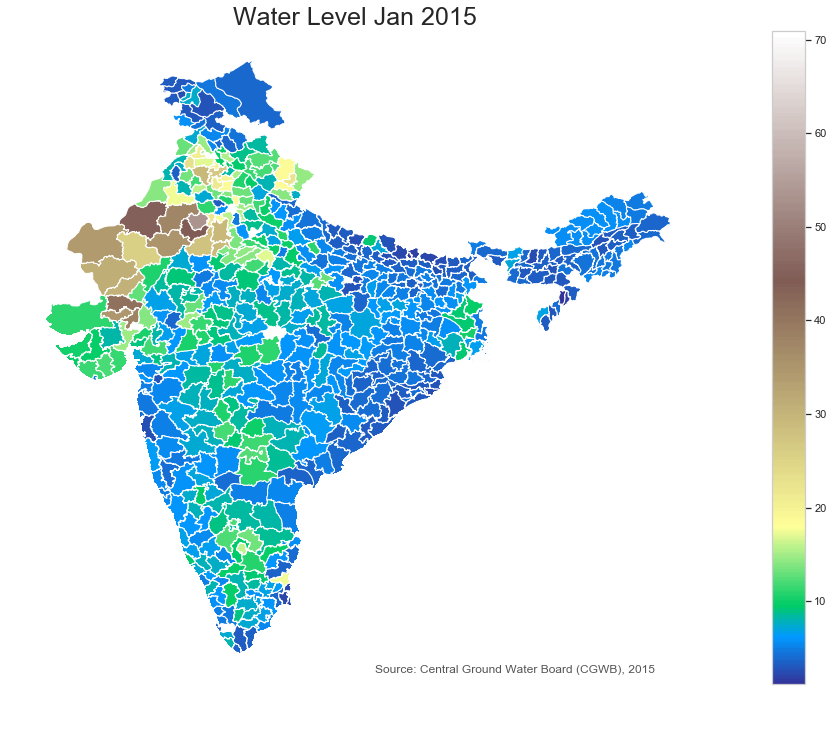

In [58]:
#draw the map
ax = gdf.dropna().plot(column='Jan 2015', cmap='terrain', norm=divnorm, legend=True)
#add title to the map
ax.set_title('Water Level Jan 2015', fontdict= {'fontsize':25})
#remove axes
ax.set_axis_off()
# create an annotation for the data source
txt = ax.annotate('Source: Central Ground Water Board (CGWB), 2015',xy=(0.45, .09),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')